In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


### checking null values

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

### deleting the columns

In [6]:
del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


### Analysing Columns

In [8]:
df['User_ID'].nunique()

5891

In [9]:
df['Product_ID'].nunique()

3623

In [10]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [11]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [13]:
df['Occupation'].nunique()

21

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df['City_Category'].nunique()

3

In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df['Marital_Status'].unique()

array([0, 1])

In [18]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [19]:
df['Product_Category_1'].nunique()

18

In [20]:
df['Purchase'].sum()

np.int64(5017668378)

#### Number of nuique values in each column

In [21]:
for i in df.columns:
    print(i, ':' ,df[i].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


## Analysing Gender column

### 1.gender ratio

<Axes: title={'center': 'Gender Ratio'}, ylabel='count'>

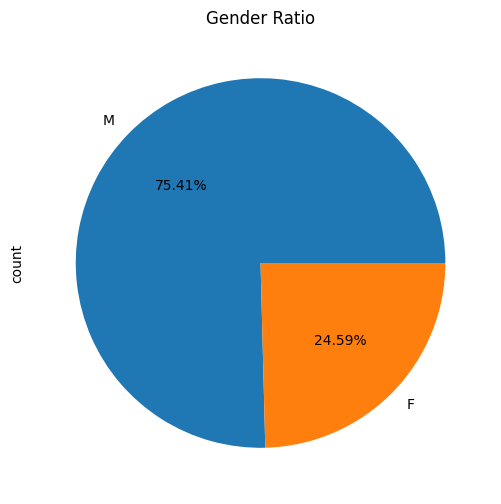

In [22]:
df.value_counts('Gender').plot(kind = 'pie', autopct = '%.2f%%', title ='Gender Ratio', figsize = (6,6))

### 2. No of males and females

<Axes: xlabel='Gender'>

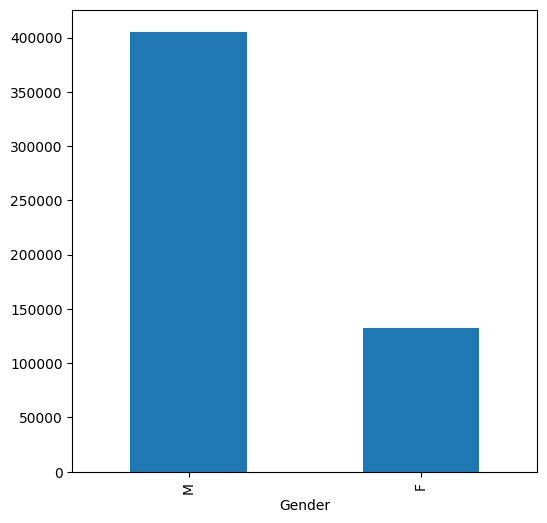

In [23]:
df.value_counts('Gender').plot(kind = 'bar', figsize = (6,6))

In [24]:
df.value_counts('Gender')

Gender
M    405380
F    132197
Name: count, dtype: int64

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


### 3.Total Purchase by Gender

<Axes: title={'center': 'Total Purchase by Gender'}, ylabel='Purchase'>

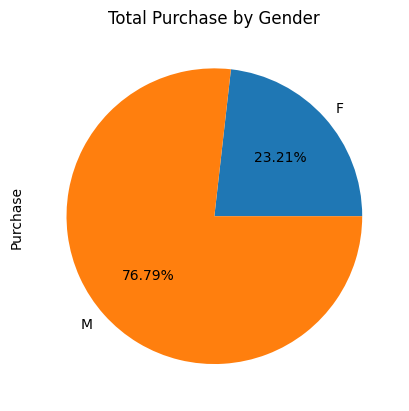

In [27]:
df.groupby('Gender')['Purchase'].sum().plot(kind='pie', autopct='%.2f%%',title = 'Total Purchase by Gender')

<Axes: title={'center': 'Average Purchase Amount by Gender'}, ylabel='Purchase'>

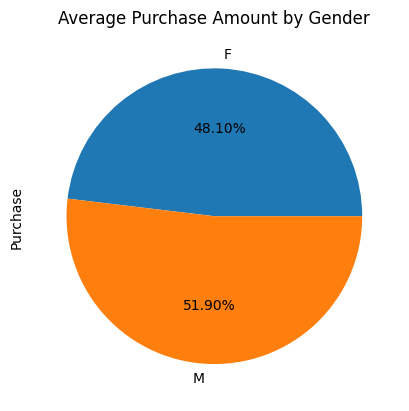

In [28]:
df.groupby('Gender')['Purchase'].mean().plot(kind='pie', autopct = '%.2f%%' ,title = 'Average Purchase Amount by Gender')

# Analysing Age & Marital Status

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

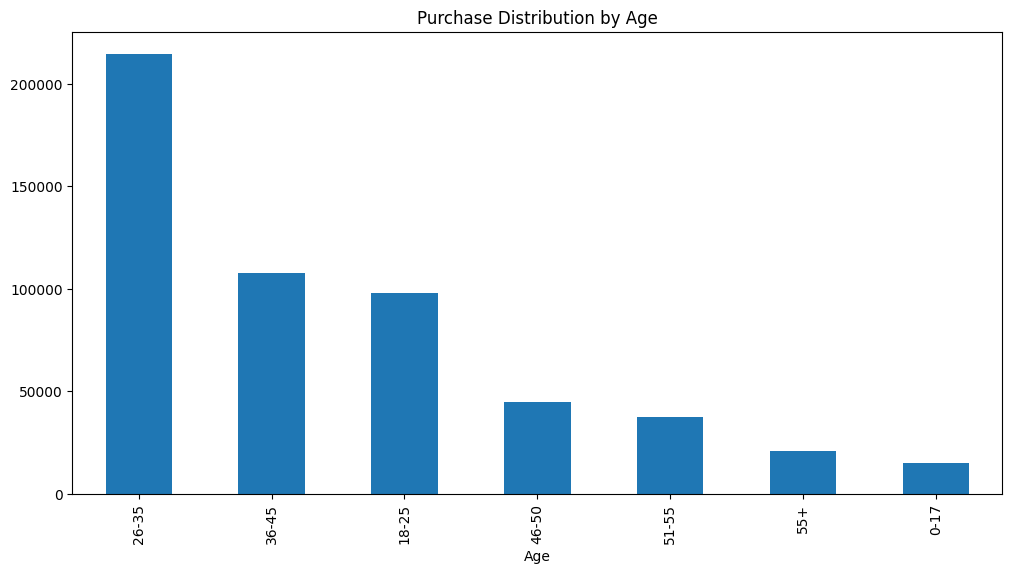

In [29]:
df.value_counts('Age').plot(kind = 'bar', figsize = (12,6) ,title = 'Purchase Distribution by Age')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

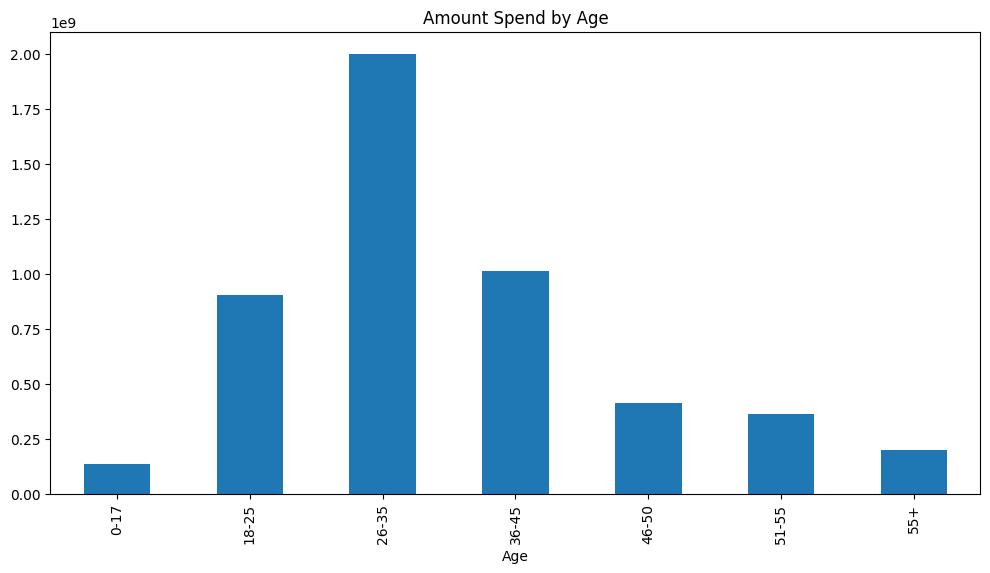

In [30]:
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar', figsize = (12,6), title = 'Amount Spend by Age')

<Axes: title={'center': 'Avg Amount Spend by each Age Group'}, xlabel='Age'>

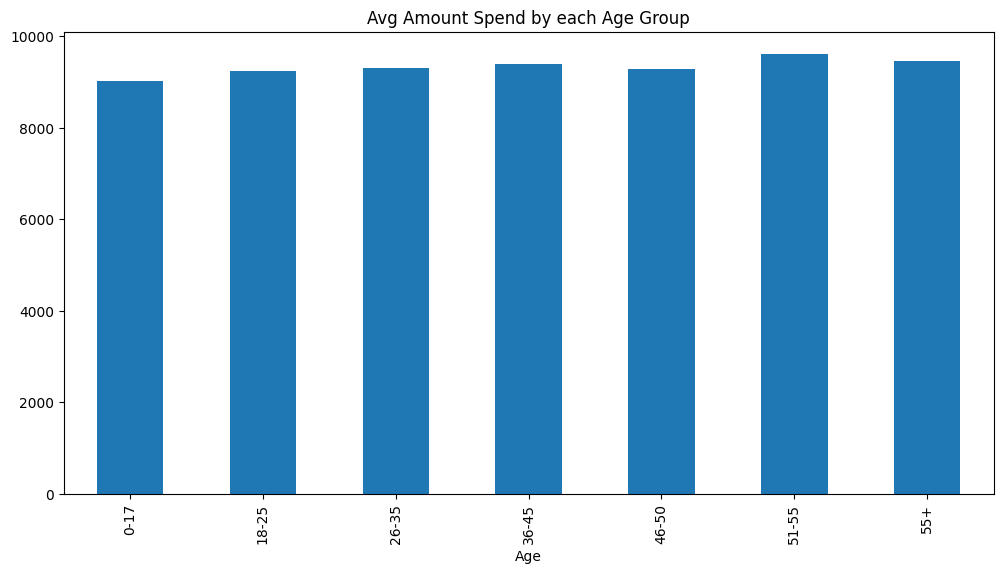

In [31]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'bar', figsize = (12, 6), title = 'Avg Amount Spend by each Age Group')

<Axes: title={'center': 'Proportion of Average Purchase Amount by Age Group'}, ylabel='Purchase'>

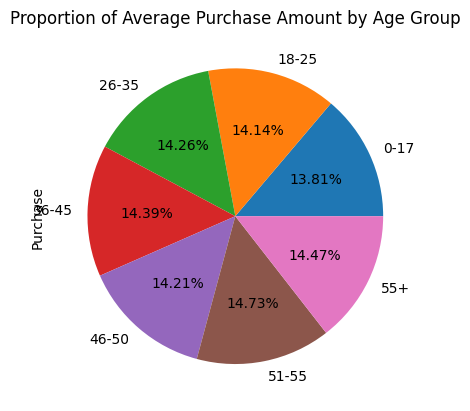

In [32]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie', autopct = '%.2f%%', title ="Proportion of Average Purchase Amount by Age Group")

<Axes: title={'center': 'Customer Breakdown by Marital Status'}, ylabel='count'>

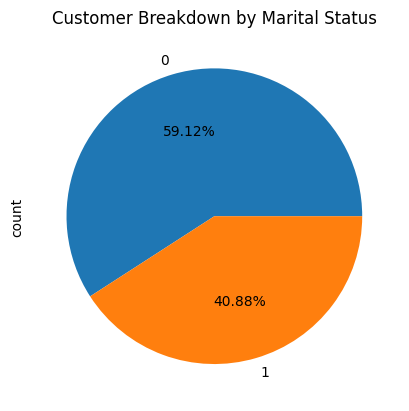

In [33]:
df.value_counts('Marital_Status').plot(kind = 'pie', autopct = '%.2f%%',title ="Customer Breakdown by Marital Status")

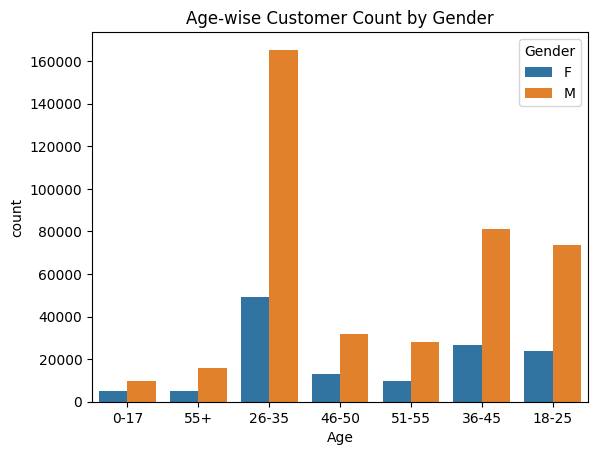

In [34]:
sns.countplot(x = 'Age' , hue ='Gender', data = df)
plt.title("Age-wise Customer Count by Gender")
plt.show()

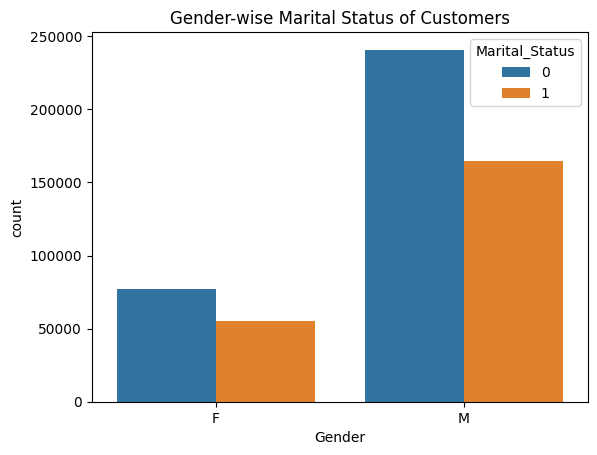

In [35]:
sns.countplot(x = 'Gender', hue = 'Marital_Status', data = df)
plt.title('Gender-wise Marital Status of Customers')
plt.show()

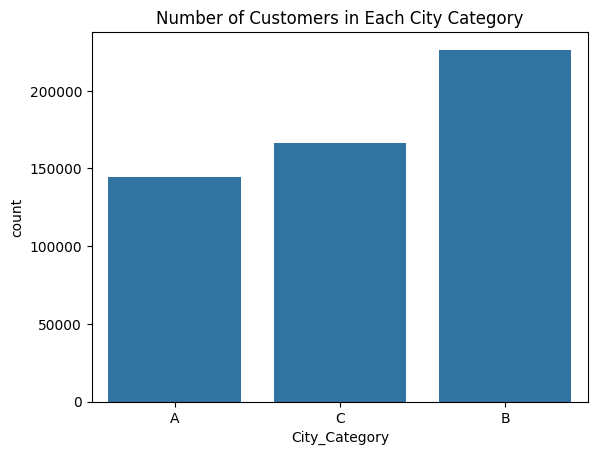

In [36]:
sns.countplot(x =df['City_Category'])
plt.title('Number of Customers in Each City Category')
plt.show()

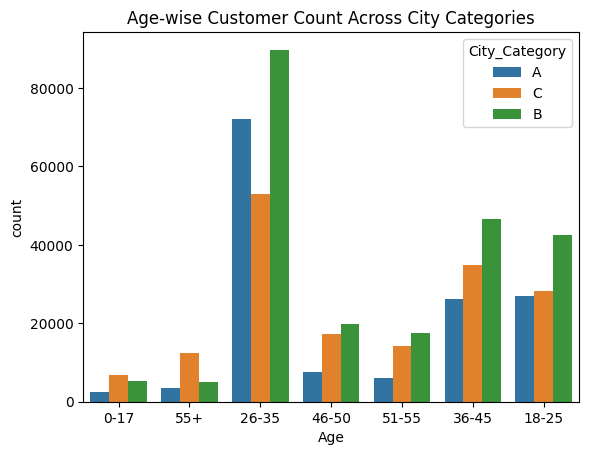

In [37]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)
plt.title('Age-wise Customer Count Across City Categories')
plt.show()

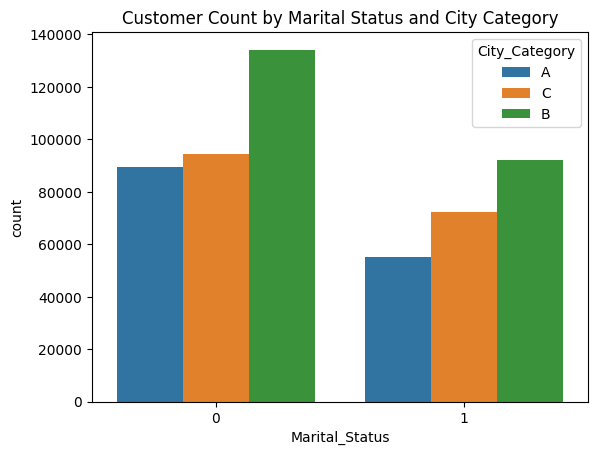

In [38]:
sns.countplot(x = 'Marital_Status' ,hue = 'City_Category', data = df)
plt.title('Customer Count by Marital Status and City Category')
plt.show()

<Axes: title={'center': 'Percentage of Customers by City Category'}, ylabel='count'>

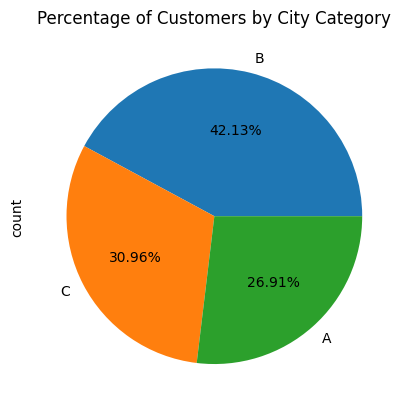

In [39]:
df.value_counts('City_Category').plot(kind = 'pie', autopct = '%.2f%%', title ='Percentage of Customers by City Category' )

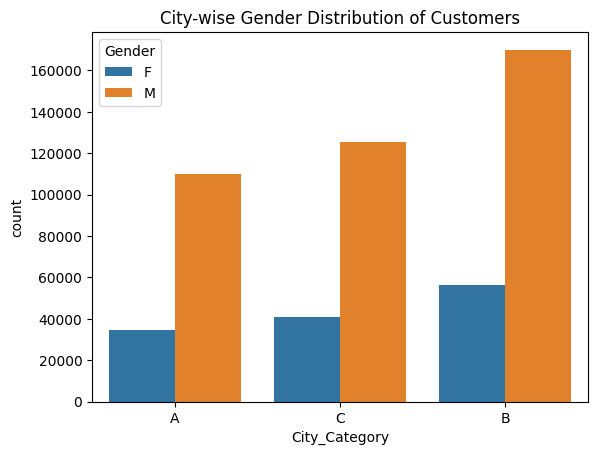

In [40]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)
plt.title('City-wise Gender Distribution of Customers')
plt.show()

<Axes: title={'center': 'City-wise Share of Total Purchases'}, ylabel='Purchase'>

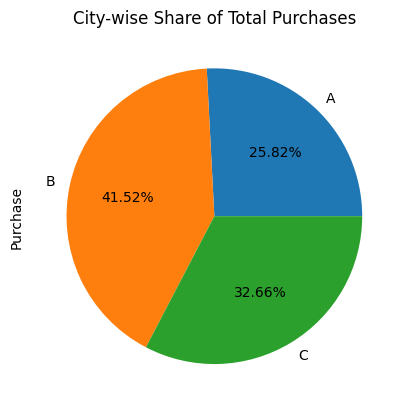

In [41]:
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie', autopct = '%.2f%%', title = 'City-wise Share of Total Purchases')

<Axes: title={'center': 'Mean Purchase Value Across City Categories'}, ylabel='Purchase'>

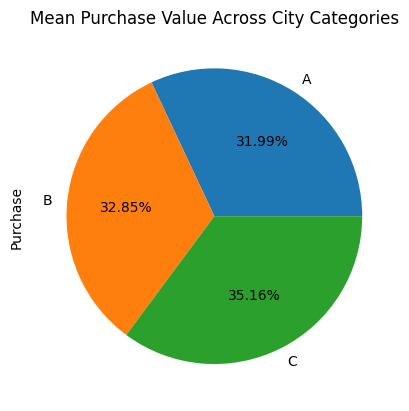

In [42]:
df.groupby('City_Category')['Purchase'].mean().plot(kind = 'pie', autopct = "%0.2f%%", title ='Mean Purchase Value Across City Categories')


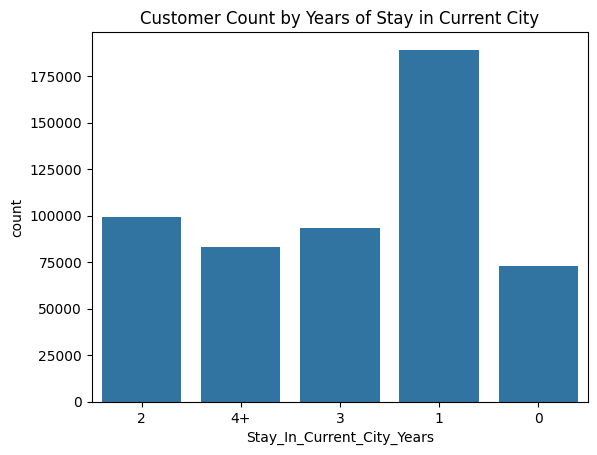

In [43]:
sns.countplot(x = 'Stay_In_Current_City_Years', data =df)
plt.title('Customer Count by Years of Stay in Current City')
plt.show()

In [44]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


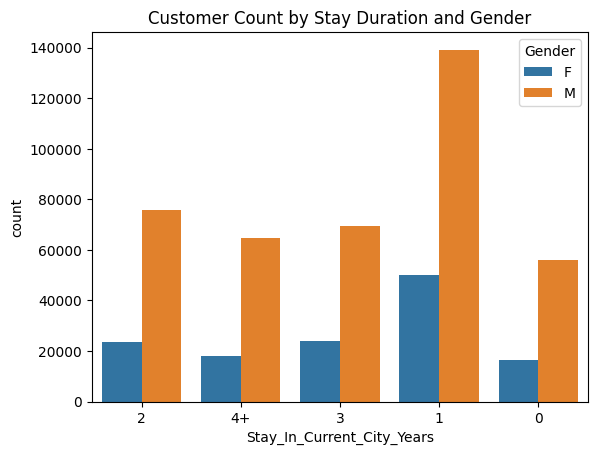

In [45]:
sns.countplot(x  ='Stay_In_Current_City_Years', hue = 'Gender', data = df)
plt.title('Customer Count by Stay Duration and Gender')
plt.show()

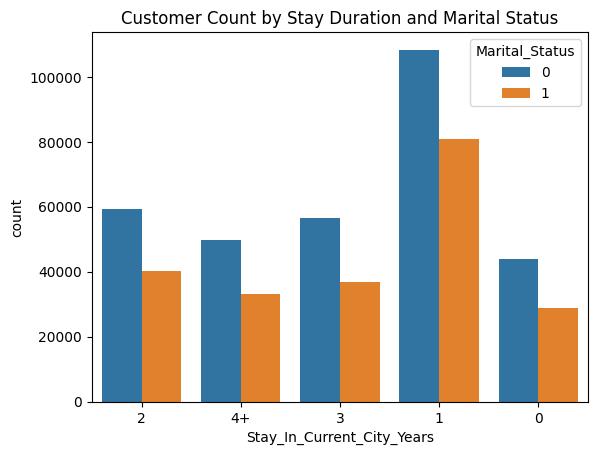

In [46]:
sns.countplot(x  ='Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)
plt.title('Customer Count by Stay Duration and Marital Status')
plt.show()

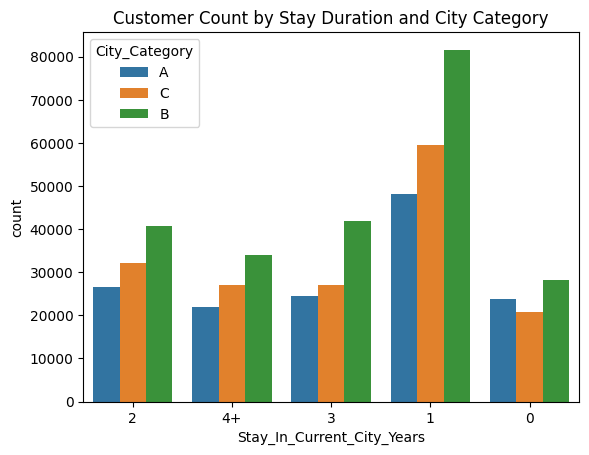

In [47]:
sns.countplot(x  ='Stay_In_Current_City_Years', hue = 'City_Category', data = df)
plt.title('Customer Count by Stay Duration and City Category')
plt.show()

In [48]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: title={'center': 'Spending Based on City Residency Duration'}, xlabel='Stay_In_Current_City_Years'>

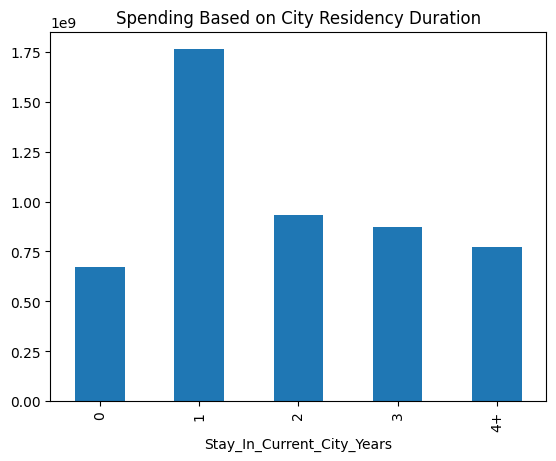

In [49]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = 'bar',title = 'Spending Based on City Residency Duration')

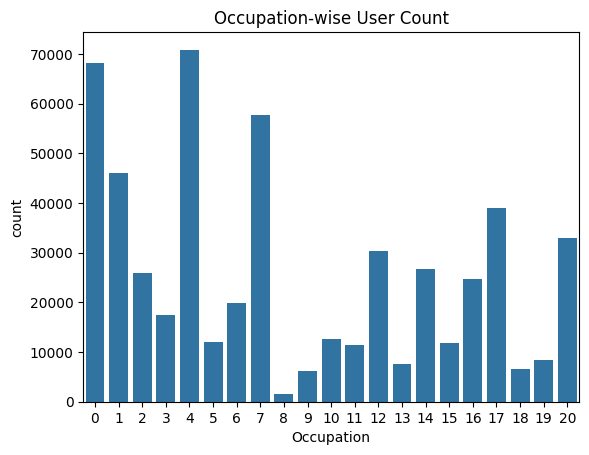

In [50]:
sns.countplot(x = 'Occupation', data = df)
plt.title('Occupation-wise User Count')
plt.show()

<Axes: title={'center': 'Sorted Distribution of Occupations'}, xlabel='Occupation'>

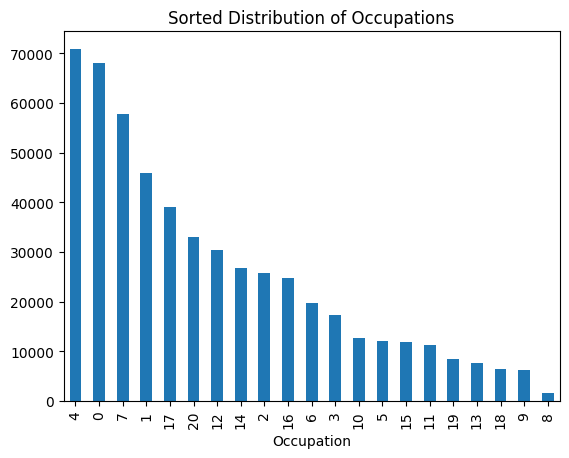

In [54]:
df.value_counts('Occupation').sort_values(ascending = False).plot(kind = 'bar',title ='Sorted Distribution of Occupations')

<Axes: title={'center': 'Occupation-wise Purchase Sum'}, xlabel='Occupation'>

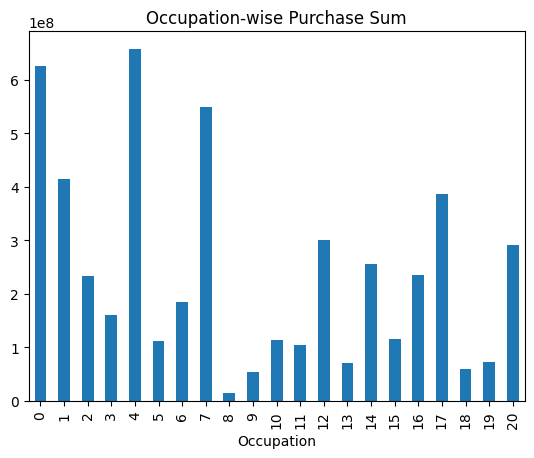

In [56]:
df.groupby('Occupation')['Purchase'].sum().plot(kind = 'bar', title ='Occupation-wise Purchase Sum')

<Axes: title={'center': 'Occupation-wise Average Spending'}, xlabel='Occupation'>

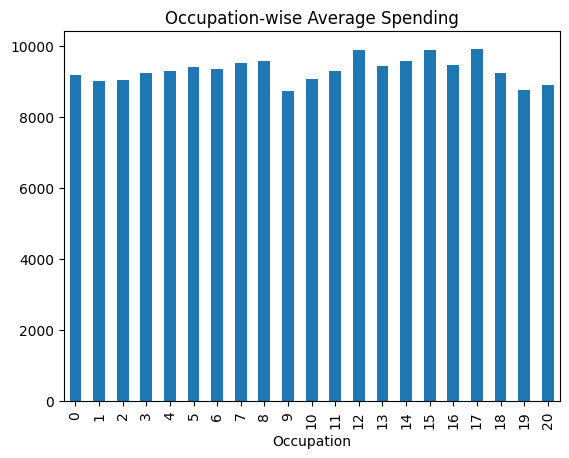

In [57]:
df.groupby('Occupation')['Purchase'].mean().plot(kind = 'bar', title ='Occupation-wise Average Spending')

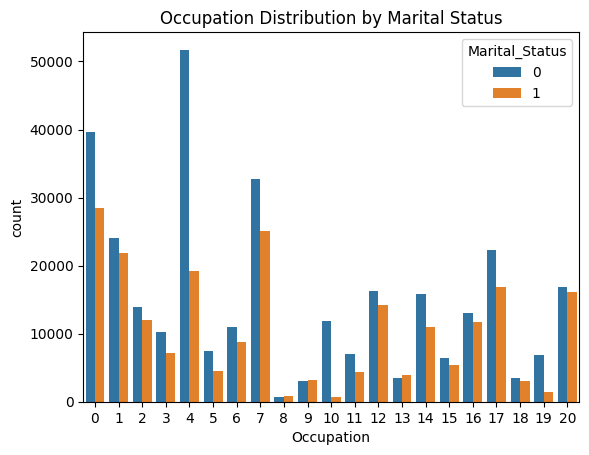

In [58]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)
plt.title('Occupation Distribution by Marital Status')
plt.show()

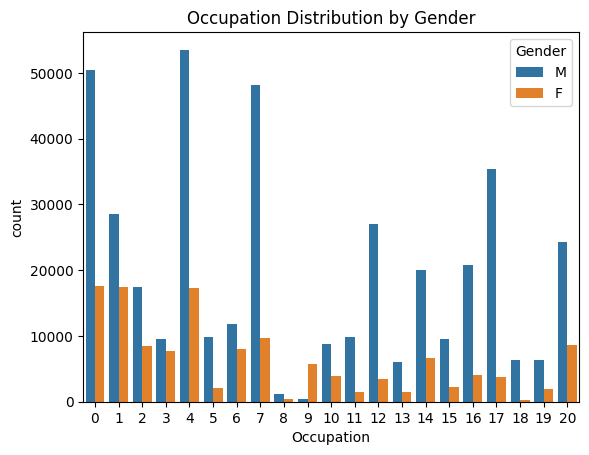

In [59]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)
plt.title('Occupation Distribution by Gender')
plt.show()

<Axes: title={'center': 'Occupation-wise Unique Product Count'}, xlabel='Occupation'>

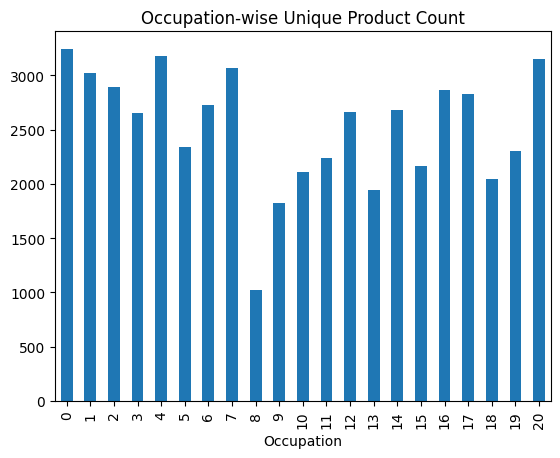

In [60]:
df.groupby('Occupation')['Product_ID'].nunique().plot(kind = 'bar', title = 'Occupation-wise Unique Product Count')

<Axes: xlabel='Product_Category_1'>

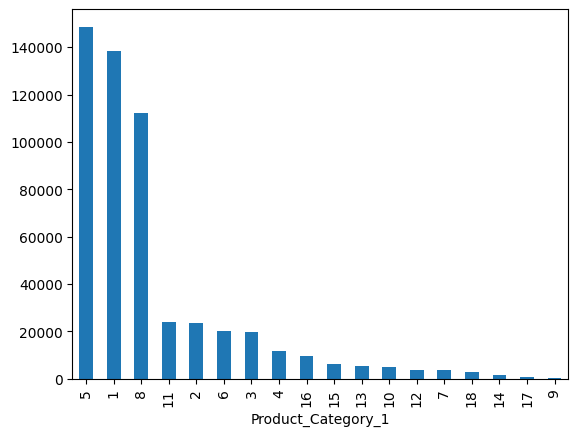

In [62]:
df.value_counts('Product_Category_1').plot(kind = 'bar')

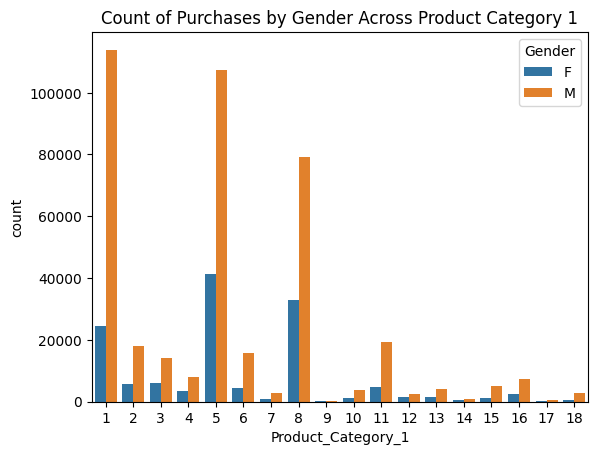

In [64]:
sns.countplot(x ='Product_Category_1', hue = 'Gender', data = df)
plt.title('Count of Purchases by Gender Across Product Category 1')
plt.show()


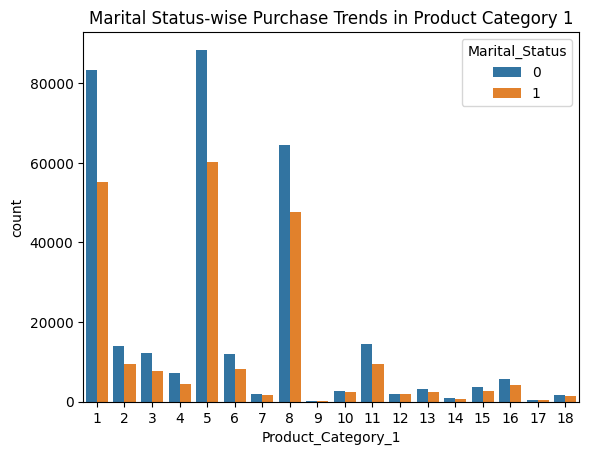

In [65]:
sns.countplot(x ='Product_Category_1', hue = 'Marital_Status', data = df)
plt.title('Marital Status-wise Purchase Trends in Product Category 1')
plt.show()